# **Assignment #1 - Reproducibility**
#### **Mining Large Scale Datasets 2024/2025**
#### Maria Rafaela Abrunhosa 107558

## Context and Motivation
This project aims to reproduce an application of a data mining process published in a scientific venue [1]. We focus on the reproduction of predictive modelling as part of the data mining process.\
The published paper used as a guide for this data mining process reproduction presents two malware feature datasets on two different platforms to support the validation of the effectiveness of a malware detection method.

The article consists of three contributions, starting with the development of two structures for creating malware datasets for Windows and Android, extracting features from malware analysis reports to create two datasets of malware features, and an evaluation of the usefulness of the datasets. However, in this work we will only attempt to reproduce the third point, the evaluation of the usefulness of the datasets in a supervised framework, as we have no way of replicating steps 1 and 2 of the article.

### What is reproducibility?
Reproducibility is the ability of a researcher to replicate the results of a previous study, using the same materials that the original researcher used, in an attempt to obtain the same results as the previous study [2].

## Dataset and pre-processing
Firstly, it's important to note that the previous study has two datasets of malware characteristics, one for Windows malware and the other for Android malware, TUMALWD and TUANDROMD respectively. However, for the purposes of this reproduction, we will only use the TUANDROMD dataset as it was the only one provided and we couldn't find the other or anything identical.

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# %pip install xgboost

# machine learning modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [3]:
# read the csv file - dataset TUANDROMD
data = pd.read_csv('TUANDROMD.csv')

data.head()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0                             0.0                   0.0              0.0   
1                             0.0                   0.0              0.0   
2                             0.0                   0.0              0.0   
3                             0.0                   0.0              0.0   
4                             0.0                   0.0              0.0   

   ACCESS_NETWORK_STATE  ...  \
0                   1.0  ...   
1                   1.0  ...   
2                   1.0  ...   
3                   0.0  ...   
4                   0.0  ...   

   Landroid/telephony/TelephonyManager;->getLine1Number  \
0                                                1.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getNetworkOperator  \
0                                                1.0          
1                                                0.0          
2                                                0.0          
3                                                1.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
0                                                1.0              
1                                                0.0              
2                                                0.0              
3                                                1.0              
4                                                0.0              

   Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
0                                                0.0            
1                                                1.0            
2                                                0.0            
3                                                1.0            
4                                                0.0            

   Landroid/telephony/TelephonyManager;->getSimOperator  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getSimOperatorName  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getSimCountryIso  \
0                                                0.0        
1                                                

### Check the following points/characteristics

In order to study if our dataset is similar to the one used in the previous study, we can check some of the dataset characteristics, following the next points presented in the previous study report.

1) Characteristics of TUANDROMD written in the paper we are using as a guide:
    1) Labels in the data: The TUANDROMD dataset has 72 labels where 71 labels represents the whole malware family and the remaining one label belong to the normal class.

    2) Number of instances: There are a total 25,553 instances for both the permission and API-based features, of which 24,553 instances belong to the malware class and the rest 1000 instances belong to the benign class.

    3) Number of features: For permission-based features, all the permissions used by the applications are extracted as features. A total of 178 features are extracted. Similarly, for API based features, a total of 186 features are extracted.

    4) Balance between the classes: The dataset is not perfectly balanced i.e., the dataset does not have an equal number of instances for both classes. This slight imblance can be easily handled by collecting more instances or sampling techniques. The proposed dataset creation framework can handle such adaptaions.

    5) Recency: The data collected for creation of TUANDROMD are recent. As and when new malicious and normal android applications are available, the dataset can be updated accordingly.

    6) Relevance: The extracted features helps distinguish between malware and benign android applications. To the best of our knowledge, these features are relevant differentiating between the two.

Dataset shape:  (4465, 242)
Labels in the data:  Label
malware     3565
goodware     899
Name: count, dtype: int64
Number of instances:  4465
Number of features:  242


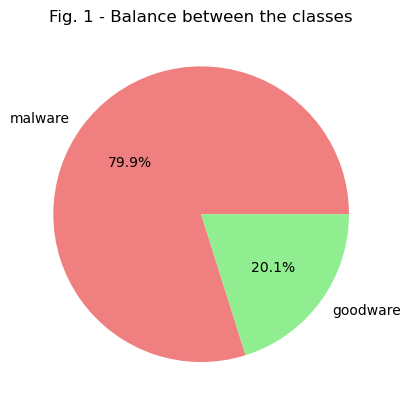

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64


In [4]:
# dataset size
print("Dataset shape: ", data.shape) # (4465, 242)

# labels in the data
labels = data['Label'].value_counts() # malware 3565 + goodware 899
print("Labels in the data: ", labels)

# number of instances
print("Number of instances: ", len(data)) # 4465

# number of features
print("Number of features: ", len(data.columns)) # 242

# balance between the classes
data['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.ylabel('')
plt.title('Fig. 1 - Balance between the classes') # very unbalanced dataset
plt.show()

# check missing values
print(data.isnull().sum()) # one empty line

### Conclusions about the previous features

##### **1. Labels in the data**.
According to the study report we should have 72 labels, 71 representing the malware family and the last one representing the goodware. However, as we can see from the previous code and results, our dataset only has two classes, the malware and the goodware, there is no distinction between the different types of malware.\
So we now have a binary class problem instead of a multiclass problem, which means that the results and reproducibility are no longer possible.

##### **2. and 3. Number of instances and number of features**.
In the previous study, they have a total of 25,553 instances, while we only have 4465.\
In terms of features we have 241 and the last column is the target value, the label.

##### **4. Balance between classes**.
Regarding the balance between classes, our dataset is also very unbalanced as the one used in the guidance paper. We have 79.9% of the data classified as malware and 20.1% as goodware.

##### **5. and 6. Recency and relevance**.
In terms of recency, we can't say if the data is recent, and unlike the study, if there are new Android apps available, good or bad, the dataset is not updated with this new data.

We can say that the features make it possible to distinguish between malware and goodware applications in terms of relevance.\
In addition, we can examine the top 15 features in our dataset and compare them with those in the study provided.

### Checking the top features for TUANDROMD

To check the top features of our dataset, we will use a Random Forest Classifier to extract the most important features and then sort them from most important to least important. After that we will get the top 15 features and compare them with the study results.\
We chose this classifier to test the extraction of the most important features, since we had to choose something and the previous study does not have any information about its extraction of the most important features. Again, these results are not reproducible.

In [5]:
# train and test split
data2 = data.dropna()
# print(data2.isnull().sum()) # one empty line

X = data2.drop(columns=['Label'])
y = data2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# list of top ranked features for tuandromd (15)
rf = RandomForestClassifier(n_estimators=100, random_state=42) # train random forest classifier
rf.fit(X_train, y_train)

# extract important features
importances = rf.feature_importances_
featureNames = X.columns

dfFeatureImportance = pd.DataFrame({'Feature': featureNames, 'Importance': importances})

# rank features by importance
topFeatures = dfFeatureImportance.sort_values(by='Importance', ascending=False)
print(topFeatures.head(15)) # to show all the 15 features

plt.figure(figsize=(25, 20))
plt.barh(topFeatures['Feature'].head(25), topFeatures['Importance'].head(25), color='plum')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features - Random Forest")
plt.gca().invert_yaxis() # most important first place
plt.show()

                                               Feature  Importance
149                             RECEIVE_BOOT_COMPLETED    0.154621
220                     Ljava/net/URL;->openConnection    0.095576
228  Landroid/location/LocationManager;->getLastKgo...    0.072026
86                                           GET_TASKS    0.060979
191                                          WAKE_LOCK    0.058397
100                          KILL_BACKGROUND_PROCESSES    0.037840
217                           Ljava/lang/System;->load    0.032456
138                                   READ_PHONE_STATE    0.029641
219                    Ljava/lang/System;->loadLibrary    0.023947
218          Ldalvik/system/DexClassLoader;->loadClass    0.022712
152                                        RECEIVE_SMS    0.020154
216                          Ljava/lang/Runtime;->exec    0.018967
190                                            VIBRATE    0.018231
233  Landroid/telephony/TelephonyManager;->getNetwo...    0.01

**TABLE I** - LIST OF TOP RANKED FEATURES FOR TUANDROMD written in the paper we are using as a guide

| Feature Rank | Feature Name |
| ------------ | ------------ |
| 1 | SEND_SMS |
| 2 | RECEIVE_BOOT_COMPLETED |
| 3 | GET_TASKS |
| 4 | *Ljava/net/URL;* − > *openConnection* |
| 5 | VIBRATE |
| 6 | WAKE_LOCK |
| 7 | KILL_BACKGROUND_PROCESSES |
| 8 | SYSTEM_ALERT_WINDOW |
| 9 | ACCESS_WIFI_STATE |
| 10 | DISABLE_KEY_GUARD |
| 11 | *Landroid/location/LocationManager;* − > *getLastKnownLocation* |
| 12 | READ_PHONE_STATE |
| 13 | RECEIVE_SMS |
| 14 | CHANGE_WIFI_STATE |
| 15 | WRITE_EXTERNAL_STORAGE |

**TABLE II** - LIST OF TOP RANKED FEATURES FOR TUANDROMD calculated using a Random Forest (trying to reproduce the paper results)

| Feature Rank | Feature | Importance |
| ------------ | ------- | ---------- |
| 1 |                            RECEIVE_BOOT_COMPLETED  |  0.154621 |
| 2 |                    Ljava/net/URL;->openConnection  |  0.095576 |
| 3 | Landroid/location/LocationManager;->getLastKgoodwarewnLocation  |  0.072026 |
| 4 |                                         GET_TASKS  |  0.060979 |
| 5 |                                         WAKE_LOCK  |  0.058397 |
| 6 |                         KILL_BACKGROUND_PROCESSES  |  0.037840 |
| 7 |                          Ljava/lang/System;->load  |  0.032456 |
| 8 |                                  READ_PHONE_STATE  |  0.029641 |
| 9 |                   Ljava/lang/System;->loadLibrary  |  0.023947 |
| 10 |         Ldalvik/system/DexClassLoader;->loadClass  |  0.022712 |
| 11 |                                       RECEIVE_SMS  |  0.020154 |
| 12 |                         Ljava/lang/Runtime;->exec  |  0.018967 |
| 13 |                                           VIBRATE  |  0.018231 |
| 14 | Landroid/telephony/TelephonyManager;->getNetworkOperator  |  0.016859 |
| 15 |                               SYSTEM_ALERT_WINDOW  |  0.016633 |

<br>

### Conclusions about the 15 top features
##### Comparing our results with the prior study
We can see that we have some top features in common with the previous study, but some of them are not in the same places, and some very important features reported in the paper are not the very important features we have extracted. For example, the top 1 feature in the previous study is *SEND_MSG*, but in our results this feature is ranked 23rd and does not even appear in the top 15 features.\
This means that our datasets have different importance for the same features, which means that the predictions can be different when training, evaluating and validating the models.

## Performance evaluation and validation

As mentioned above, the dataset provided is for binary classification, whereas the study dataset is multiclass. Therefore, we can assume in advance that the results of our models will not be the same as the results of the study. Furthermore, the importance of the features is different between the study dataset and our dataset, which may lead to different results.\
Again, this work cannot be replicated with the small amount of information and differences we have.

#### Cross-validation:
Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data [5]. This technique divides our dataset into multiple folds, in this case 10 folds, and then uses one of the folds for validation and the other for model training. This process is repeated for all combinations where each of the subsets was used as a validation set.\
Finally, the results of each training and validation are stored and output, as well as an average result of all the validations.\
This process helps to ensure that the models generalise well to new data and prevents overfitting.

#### Classifiers:
To evaluate performance, we used the same five classifiers as in the previous study, and for each classifier, we used a K-fold cross validation as already explained, with k=10.

- **Random Forest:** is a collection of decision trees that work together to make predictions [6]. All the trees vote to make a prediction.
- **Extra Tree:** aggregates the results of multiple decorrelated decision trees collected in a "forest" to output it's classification result [7]. It differs from the Random Forest in the construction of the decision trees in the forest.
- **Ada Boost:** starts by fitting a classifier to the original dataset and then fits additional copies of the classifier to the same dataset, adjusting the weights of misclassified instances so that subsequent classifiers focus more on difficult cases [8].
- **XgBoost:** provides parallel tree boosting. It is a type of ensemble learning that combines several weak models to form a stronger model.
- **Gradient Boosting:** builds an additive model in a forward stepwise fashion, allowing the optimisation of arbitrary differentiable loss functions [10].

#### Parameters:
Regarding the parameters, the provided study does not give any information about which parameters are used and with which values. For this reason, we used the default values as much as possible, assuming that these models were created with default values.\
We chose the number of estimators only because many of the models may stop before reaching this value if there are some early stopping criteria, and also chose the random state value as 42.
This number works as a convention of random state because it ensures:
1. Reproducibility - the same random numbers are generated each time the code is run.
2. Consistency - helps maintain consistency across experiments, making debugging and comparisons easier.

#### Metrics:
The only metric used to evaluate performance in the previous study was test accuracy, or at least is the only one mentioned in the study. For this reason, it is the only metric we have evaluated and used to compare the results.\
It is important to note that even though this metric is useful to compare our results with the results of the study, this metric is not good for evaluating the performance of the models because, as explained before, both datasets are very unbalanced, so accuracy is not a good metric for these cases.

In [7]:
# cross validation with k=10
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=42)

In [8]:
# initialize 5 classifiers
rfClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
etClassifier = ExtraTreesClassifier(n_estimators = 100)
abClassifier = AdaBoostClassifier(n_estimators=100, random_state=42)
xgbClassifier = XGBClassifier(n_estimators=100, max_depth=1)
gbClassifier = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=42)

# train 5 classifiers
crossResultsrfClassifier = cross_val_score(rfClassifier, X, y, cv=kfold)
crossResultsetClassifier = cross_val_score(etClassifier, X, y, cv=kfold)
crossResultsabClassifier = cross_val_score(abClassifier, X, y, cv=kfold)
crossResultsgbClassifier = cross_val_score(gbClassifier, X, y, cv=kfold)

label_encoder = LabelEncoder()
yEncode = label_encoder.fit_transform(y) # xgb only accepts numerical values so we need to convert the labels to 0 and 1
# print(y) # 'goodware' -> 0 and 'malware' -> 1
crossResultsxgbClassifier = cross_val_score(xgbClassifier, X, yEncode, cv=kfold)

# evaluate models accuracy
print(f'Cross-Validation Random Forest Classifier Results (Accuracy): {crossResultsrfClassifier}')
print(f'Mean Accuracy Random Forest Classifier: {crossResultsrfClassifier.mean()}')

print(f'Cross-Validation Extra Tree Classifier Results (Accuracy): {crossResultsetClassifier}')
print(f'Mean Accuracy Extra Tree Classifier: {crossResultsetClassifier.mean()}')

print(f'Cross-Validation Ada Boost Classifier Results (Accuracy): {crossResultsabClassifier}')
print(f'Mean Accuracy Ada Boost Classifier: {crossResultsabClassifier.mean()}')

print(f'Cross-Validation XgBoost Classifier Results (Accuracy): {crossResultsxgbClassifier}')
print(f'Mean Accuracy XgBoostClassifier: {crossResultsxgbClassifier.mean()}')

print(f'Cross-Validation Gradient Boosting Classifier Results (Accuracy): {crossResultsgbClassifier}')
print(f'Mean Accuracy Gradient Boosting Classifier: {crossResultsgbClassifier.mean()} %')

Cross-Validation Random Forest Classifier Results (Accuracy): [0.99552573 0.99552573 0.99328859 0.99776286 0.9955157  0.98878924
 0.99327354 0.99775785 0.9955157  0.99775785]
Mean Accuracy Random Forest Classifier: 0.9950712773748258
Cross-Validation Extra Tree Classifier Results (Accuracy): [0.99552573 0.99552573 0.99328859 0.99776286 0.9955157  0.99327354
 0.9955157  0.99775785 0.9955157  0.99775785]
Mean Accuracy Extra Tree Classifier: 0.995743923114736
Cross-Validation Ada Boost Classifier Results (Accuracy): [0.98210291 0.98657718 0.97091723 0.97986577 0.98430493 0.98206278
 0.98430493 0.98878924 0.98654709 0.98430493]
Mean Accuracy Ada Boost Classifier: 0.9829776988593615
Cross-Validation XgBoost Classifier Results (Accuracy): [0.9753915  0.98434004 0.96868009 0.9753915  0.98206278 0.98206278
 0.97309417 0.99103139 0.98430493 0.98206278]
Mean Accuracy XgBoostClassifier: 0.9798421966071768
Cross-Validation Gradient Boosting Classifier Results (Accuracy): [0.96644295 0.9753915  0.9

### Table of obtained results

**TABLE III** - TEST ACCURACIES FOR EACH CLASSIFIER written in the paper we are using as a guide

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 99.5% |
| Extra Tree | 99.5% |
| Ada Boost | 98.3% |
| XgBoost | 98.0% |
| Gradient Boosting | 97.0% |

### Table of the prior study results

**TABLE IV** - TEST ACCURACIES FOR EACH CLASSIFIER (trying to reproduce the paper results)

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 98.7% |
| Extra Tree | 98.8% |
| Ada Boost | 97.9% |
| XgBoost | 97.8% |
| Gradient Boosting | 97.4% |

### Comparison of the results

Looking at these tables, we can see that the results are not the same, although they are not very different. We have some higher results for the first three classifiers than the results of the study, but lower results for the last two classifiers.

These differences in the results could be due to the different data sets, to the change between a multiclass classification and a binary classification (our case) or even to the different parameters used in the classifiers.\
We can now conclude that the study modelling process is not reproducible for many factors and reasons, but mainly because we do not have the information needed to reproduce the different steps in this process.

### Performance evaluation and validation using only the top 15 features

As an experiment, we decided to train the models on the most relevant features rather than all of them. We used the 15 most important features resulting from the random forest explained above. This test was done to see if the results were closer to those obtained in the study presented.

We also added some random parameters instead of all the standard ones.

In [9]:
dataTopFeatures = data[topFeatures.head(15)['Feature'].tolist() + ['Label']] # using only the top 15 features
print(dataTopFeatures.shape)

dataTopFeatures = dataTopFeatures.dropna()

XTopFeatures = dataTopFeatures.drop(columns=['Label'])
yTopFeatures = dataTopFeatures['Label']

(4465, 16)


In [10]:
# cross validation with k=10
nfoldsTopFeatures = 10
kfoldTopFeatures = KFold(n_splits=nfoldsTopFeatures, shuffle=True, random_state=42)

# initialize 5 classifiers
rfClassifierTopFeatures = RandomForestClassifier(n_estimators=100, random_state=42)
etClassifierTopFeatures = ExtraTreesClassifier(n_estimators = 100, criterion ='entropy')
abClassifierTopFeatures = AdaBoostClassifier(n_estimators=100, random_state=42)
xgbClassifierTopFeatures = XGBClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, objective='binary:logistic')
gbClassifierTopFeatures = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# train 5 classifiers
crossResultsrfClassifierTopFeatures = cross_val_score(rfClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsetClassifierTopFeatures = cross_val_score(etClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsabClassifierTopFeatures = cross_val_score(abClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsgbClassifierTopFeatures = cross_val_score(gbClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)

label_encoder = LabelEncoder()
yEncodeTopFeatures = label_encoder.fit_transform(y) # xgb only accepts numerical values so we need to convert the labels to 0 and 1
# print(y) # 'goodware' -> 0 and 'malware' -> 1
crossResultsxgbClassifierTopFeatures = cross_val_score(xgbClassifierTopFeatures, X, yEncodeTopFeatures, cv=kfoldTopFeatures)

# evaluate models accuracy
print(f'Cross-Validation Random Forest Classifier TopFeatures Results (Accuracy): {crossResultsrfClassifierTopFeatures}')
print(f'Mean Accuracy Random Forest Classifier TopFeatures: {crossResultsrfClassifierTopFeatures.mean()}')

print(f'Cross-Validation Extra Tree Classifier TopFeatures Results (Accuracy): {crossResultsetClassifierTopFeatures}')
print(f'Mean Accuracy Extra Tree Classifier TopFeatures: {crossResultsetClassifierTopFeatures.mean()}')

print(f'Cross-Validation Ada Boost Classifier TopFeatures Results (Accuracy): {crossResultsabClassifierTopFeatures}')
print(f'Mean Accuracy Ada Boost Classifier TopFeatures: {crossResultsabClassifierTopFeatures.mean()}')

print(f'Cross-Validation XgBoost Classifier TopFeatures Results (Accuracy): {crossResultsxgbClassifierTopFeatures}')
print(f'Mean Accuracy XgBoostClassifier TopFeatures: {crossResultsxgbClassifierTopFeatures.mean()}')

print(f'Cross-Validation Gradient Boosting Classifier TopFeatures Results (Accuracy): {crossResultsgbClassifierTopFeatures}')
print(f'Mean Accuracy Gradient Boosting Classifier TopFeatures: {crossResultsgbClassifierTopFeatures.mean()} %')

Cross-Validation Random Forest Classifier TopFeatures Results (Accuracy): [0.98881432 0.98881432 0.9753915  0.98881432 0.98430493 0.98206278
 0.98654709 0.99327354 0.98654709 0.98654709]
Mean Accuracy Random Forest Classifier TopFeatures: 0.9861116963112329
Cross-Validation Extra Tree Classifier TopFeatures Results (Accuracy): [0.98881432 0.98881432 0.9753915  0.98881432 0.98430493 0.98206278
 0.98430493 0.99327354 0.98430493 0.98878924]
Mean Accuracy Extra Tree Classifier TopFeatures: 0.9858874810645961
Cross-Validation Ada Boost Classifier TopFeatures Results (Accuracy): [0.97091723 0.98210291 0.95973154 0.96420582 0.97533632 0.97085202
 0.96860987 0.97085202 0.97085202 0.97533632]
Mean Accuracy Ada Boost Classifier TopFeatures: 0.9708796059429581
Cross-Validation XgBoost Classifier TopFeatures Results (Accuracy): [0.97986577 0.98881432 0.96868009 0.97986577 0.98430493 0.98206278
 0.98430493 0.9955157  0.98878924 0.98654709]
Mean Accuracy XgBoostClassifier TopFeatures: 0.983875061446

### Table of obtained results for 15 top features

**TABLE V** - TEST ACCURACIES FOR EACH CLASSIFIER (trying to reproduce the paper results using only top 15 features)

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 98.6% |
| Extra Tree | 98.6% |
| Ada Boost | 97.1% |
| XgBoost | 98.4% |
| Gradient Boosting | 97.4% |

### Comparison of the results
Looking at this table, we can see that the results are not the same, but a little closer. We have some lower results for the first three classifiers than the results of the study, but higher and even equal results for the last two classifiers.

These differences in the results could be due to the different data sets, to the change between a multiclass classification and a binary classification (our case) or even to the different parameters used in the classifiers.\
Despite this approximation of the values, we cannot conclude that this study is reproducible, as the same results could be a matter of luck. We still have many factors and reasons for this unreproducibility, but mainly because we do not have the information needed to reproduce the different steps in this process, since the dataset to the parameters used in the classifiers.

## Discussion and Conclusion

We cannot conclude which study is better in terms of the accuracies obtained by the classifiers because, as already explained, accuracy is not the best performance evaluation metric for this dataset, a very unbalanced dataset.

### Evaluation of Replication Success or Failure
We could not replicate the methodology or the results. The only thing we did exactly as in the previous study was to use the value k=10 in the cross-validation and to use the same five classifiers as in the performance evaluation. None of this is relevant or sufficient to replicate the predictive modelling.

As mentioned above, our dataset is very different from the one used in the previous study. By comparing only the simplest features, we conclude that it is only in the part of the dataset where this replication is not possible. We have even moved from a multiclass problem classification to a binary class problem classification.

Furthermore, the hyperparameter supply, which is very important, does not exist. We have no information about the parameters used to train the models. Since we know that the performance of the algorithms depends on the hyperparameters and since we do not have any indication of which parameters were used, we can never reproduce the predictive modelling with the same factors as the study provided.

### Proposed Solutions
There are some aspects of the publication that could make the replication process easier. For example, they could publish the dataset they created and add a link to the references so that we can access the original datasets used in the study.

Also, for each classifier, they could write a small table explaining which parameters were used in each classifier and even justify their choices.

### Conclusion

At the end of this study, we have already seen that our main objective has not been achieved, as we have not been able to reproduce the results of the previous study. Even with the cross-validation and training of the same five classifiers used in the previous study, we could not get the same results.

In order to reproduce the previous study, we would need some more information, for example, the dataset used should be provided, because for different datasets the results are obviously different, and the parameters used to train the models should also be provided. These two pieces of information are key to a reproducible paper, as they are the most meaningful parts of a predictive modelling process.

We also understand the importance of reproducibility and transparency when publishing in a scientific venue. It is important for the machine learning based scientific community to be transparent so that we can reproduce some of the published work. Without this, we cannot prove that a new technique we have implemented is an improvement if we cannot get the same accuracy and results for the original research. If no one gets the same results as us, it is likely that we are doing something wrong; by sharing all the data and tools, we can discuss the results with more researchers. Furthermore, there may be cases where if we cannot produce the same results, the same good results may be due to randomness, and non-reproducible models are less reliable since we cannot prove that these results can be achieved, which means they can be inferred for some anomaly.

# **<font color="lightcoral"></font>**

## Bibliography
[1] https://ieeexplore.ieee.org/document/9312053\
[2] https://uapt33090-my.sharepoint.com/:b:/r/personal/alina_trifan_ua_pt/Documents/MDLE/aula%2002/MLD_02.pdf?csf=1&web=1&e=0AwwEE\
[3] https://stackoverflow.com/questions/54034392/machine-learning-feature-ranking-by-algorithms\
[4] https://www.geeksforgeeks.org/feature-selection-using-random-forest/\
[5] https://www.geeksforgeeks.org/cross-validation-machine-learning/\
[6] https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/\
[7] https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/\
[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html\
[9] https://xgboost.readthedocs.io/en/stable/get_started.html\
[10] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html\
[11] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html\
[12] https://stackoverflow.com/questions/34265102/xgboost-categorical-variables-dummification-vs-encoding\
[13] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html\
[14] https://www.markdownguide.org/hacks/\
[15] https://blog.ml.cmu.edu/2020/08/31/5-reproducibility/